In [28]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
df_1 = pd.read_csv('../data/data_1__.csv')
df_1 = df_1.drop(['index'],axis=1)

In [3]:
df_1['data'] = pd.to_datetime(df_1['data'])
df_1.set_index('data', inplace=True)

In [4]:
df_1.head()

,valor
data,
2016-08-29,9.00
2016-08-30,1.60
2016-08-31,15311.70
2016-09-01,13932.67
2016-09-02,11535.45


In [5]:
month_data = df_1.resample('M').sum()

In [6]:
month_data

,valor
data,
2016-08-31,15322.30
2016-09-30,763561.69
2016-10-31,1060060.55
2016-11-30,972638.69
2016-12-31,1090154.76
2017-01-31,1145117.60
2017-02-28,593055.09
2017-03-31,872141.22
2017-04-30,803613.69


In [7]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [9]:
df = month_data.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2016-08-31,15322.30
1,2016-09-30,763561.69
2,2016-10-31,1060060.55
3,2016-11-30,972638.69
4,2016-12-31,1090154.76


In [10]:
prediction_size = 1
train_df = df[:-prediction_size]

In [11]:
m = Prophet()
m.fit(train_df)

In [20]:
future = m.make_future_dataframe(periods=1)

forecast = m.predict(future)

In [21]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
22,2018-06-30,618206.614969,629620.794631,790784.135181,618206.614969,618206.614969,96256.018554,96256.018554,96256.018554,96256.018554,96256.018554,96256.018554,0.0,0.0,0.0,714462.633523
23,2018-07-31,611626.681621,557823.348716,722992.537874,611626.681621,611626.681621,30748.172307,30748.172307,30748.172307,30748.172307,30748.172307,30748.172307,0.0,0.0,0.0,642374.853928
24,2018-08-31,605046.748272,640519.130303,795483.742890,605046.748272,605046.748272,113975.264672,113975.264672,113975.264672,113975.264672,113975.264672,113975.264672,0.0,0.0,0.0,719022.012944
25,2018-09-30,598679.070838,647019.358238,809028.095358,598679.070838,598679.070838,126775.863173,126775.863173,126775.863173,126775.863173,126775.863173,126775.863173,0.0,0.0,0.0,725454.934011
26,2018-10-01,598466.814923,496768.264972,657482.333733,598466.814923,598466.814923,-24873.141411,-24873.141411,-24873.141411,-24873.141411,-24873.141411,-24873.141411,0.0,0.0,0.0,573593.673512


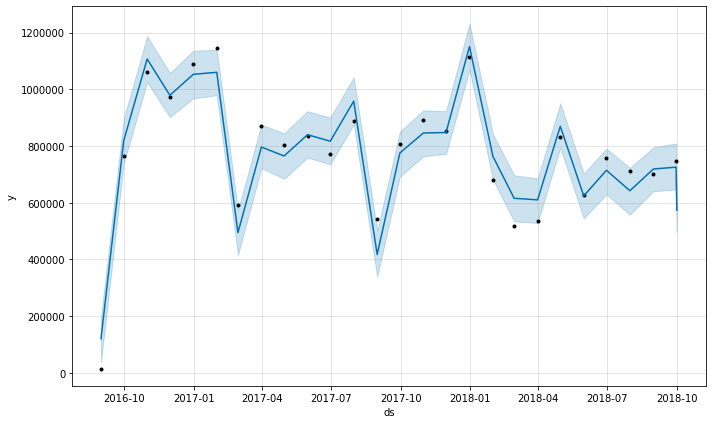

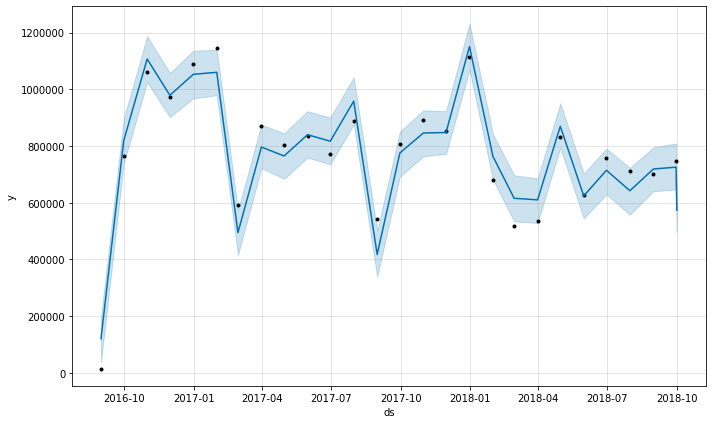

In [22]:
m.plot(forecast)

In [23]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [24]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df = cmp_df.dropna()

In [31]:
print('MAE:', metrics.mean_absolute_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))  
print('MSE:', metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:])))

MAE: 22198.285988940625
MSE: 492763900.84679765
RMSE: 22198.285988940625


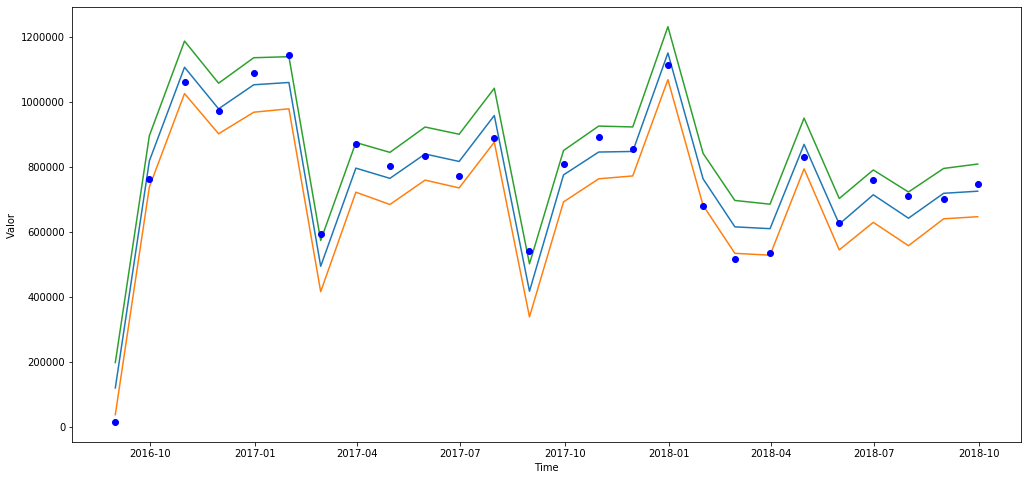

In [32]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'],'bo')
plt.xlabel('Time')
plt.ylabel('Valor')
plt.grid(False)
plt.show()